In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  142M    0 14560    0     0  33089      0  1:15:20 --:--:--  1:15:20 33166
  0  142M    0  523k    0     0   369k      0  0:06:34  0:00:01  0:06:33  370k
 10  142M   10 14.7M    0     0  6268k      0  0:00:23  0:00:02  0:00:21 6271k
 25  142M   25 36.0M    0     0  10.5M      0  0:00:13  0:00:03  0:00:10 10.5M
 40  142M   40 57.5M    0     0  13.0M      0  0:00:10  0:00:04  0:00:06 13.0M
 56  142M   56 80.1M    0     0  14.8M      0  0:00:09  0:00:05  0:00:04 16.1M
 71  142M   71  101M    0     0  15.8M      0  0:00:08  0:00:06  0:00:02 20.2M
 84  142M   84  120M    0     0  16.2M      0  0:00:08  0:00:07  0:00:01 21.1M
 99  142M   99  142M    0     0  16.9M      0  0:00:08  0:00:08 --:--:-- 21.2M
100  142M  100  142M    0     0  16.9M      0  0:00

In [6]:
!curl -O https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 10.9M    0 13172    0     0  28977      0  0:06:36 --:--:--  0:06:36 29077
  3 10.9M    3  350k    0     0   276k      0  0:00:40  0:00:01  0:00:39  277k
 99 10.9M   99 10.9M    0     0  4934k      0  0:00:02  0:00:02 --:--:-- 4938k
100 10.9M  100 10.9M    0     0  4944k      0  0:00:02  0:00:02 --:--:-- 4947k


In [9]:
import zipfile

zip_ref = zipfile.ZipFile("horse-or-human.zip")
zip_ref.extractall("dataset/image_classification/horse_human/train")

zip_ref = zipfile.ZipFile("validation-horse-or-human.zip")
zip_ref.extractall("dataset/image_classification/horse_human/validation")
zip_ref.close()

In [349]:
def take_image_dataset_from_directory(filepath, label_mode, img_size, batch_size, shuffle=False):
    img_dataset = tf.keras.preprocessing.image_dataset_from_directory(filepath,
                                                                      label_mode=label_mode,
                                                                      batch_size=batch_size,
                                                                      image_size=img_size,
                                                                      shuffle=shuffle)

    return img_dataset

In [350]:
train_dataset = take_image_dataset_from_directory("dataset/image_classification/horse_human/train",
                                                  "binary",
                                                  (128, 128),
                                                  32,
                                                  shuffle=True)

Found 1027 files belonging to 2 classes.


In [351]:
train_dataset.class_names

['horses', 'humans']

In [352]:
class_names = train_dataset.class_names

In [353]:
val_dataset = take_image_dataset_from_directory("dataset/image_classification/horse_human/validation",
                                                "binary",
                                                (128, 128),
                                                32)

Found 256 files belonging to 2 classes.


In [360]:
sample_train_img = train_dataset.take(1)
sample_img = []
sample_label = []

for i in sample_train_img.unbatch().as_numpy_iterator():
    img, label = i
    sample_img.append(img)
    sample_label.append(label)

In [361]:
sample_label[:10]

[array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32)]

In [362]:
sample_img[0]

array([[[103.892334, 144.22046 , 210.77954 ],
        [104.015625, 144.66138 , 211.      ],
        [104.210205, 143.88208 , 211.      ],
        ...,
        [101.      , 146.88208 , 214.35938 ],
        [101.984375, 147.      , 214.99487 ],
        [102.      , 147.77954 , 215.      ]],

       [[105.671875, 145.01562 , 212.33862 ],
        [104.015625, 145.01538 , 212.01562 ],
        [104.640625, 145.      , 212.00562 ],
        ...,
        [102.015625, 147.64624 , 215.64624 ],
        [102.015625, 148.01562 , 216.01538 ],
        [103.35425 , 148.01562 , 216.677   ]],

       [[105.671875, 146.56958 , 214.11792 ],
        [106.984375, 146.00562 , 213.36938 ],
        [106.12915 , 146.      , 213.5896  ],
        ...,
        [104.      , 149.      , 217.      ],
        [104.995605, 149.      , 217.00562 ],
        [105.      , 149.56958 , 218.35938 ]],

       ...,

       [[255.      , 238.43604 , 217.88208 ],
        [255.      , 232.94751 , 210.5625  ],
        [254.25317 , 2

In [363]:
import matplotlib.pyplot as plt

In [364]:
import random
def visualize_random_img(img, label):
    random_num = random.randint(0, len(img)-1)
    random_img = img[random_num]
    random_label = label[random_num]
    random_class = class_names[int(random_label)]
    print(random_img.shape)
    plt.figure(figsize=(10, 7))
    plt.imshow(random_img/255.)
    plt.title(f"Class: {random_class}")
    plt.axis(False)

(128, 128, 3)


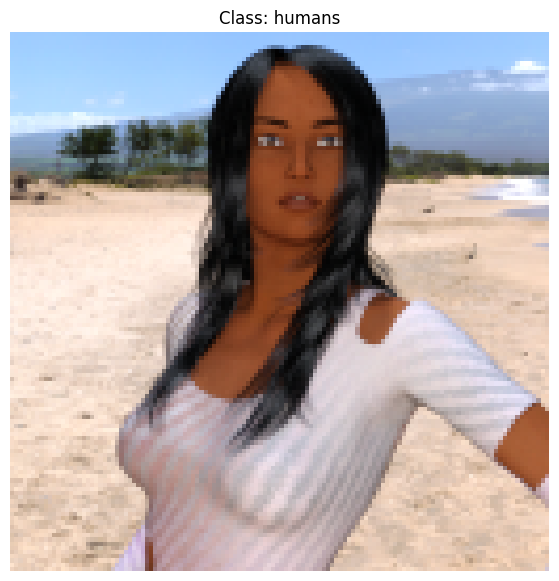

In [367]:
visualize_random_img(sample_img, sample_label)

In [368]:
from tensorflow.keras import layers

In [369]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [370]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [371]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [372]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    # layers.RandomHeight(0.2),
    # layers.RandomWidth(0.2),
    layers.Rescaling(1/255.)
], name="data_augmentation_layer")

(128, 128, 3)
humans


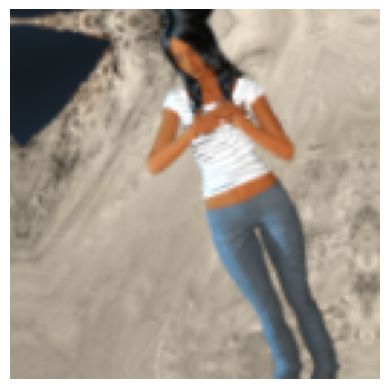

In [377]:
aug_img = data_augmentation(tf.expand_dims(sample_img[1], axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(aug_img))
plt.axis(False)
print(tf.squeeze(aug_img).shape)
print(class_names[int(sample_label[1])])

In [378]:
tf.keras.backend.clear_session()

In [379]:
INPUT_SHAPE = (128, 128, 3)
inputs = layers.Input(shape=INPUT_SHAPE, dtype=tf.float32)
x = data_augmentation(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D(2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1")

In [380]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 128, 128, 3)      0         
 quential)                                                       
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 10)        910 

In [281]:
model_1_init_weights = model_1.get_weights()

In [282]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [283]:
model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=10)

Epoch 1/10
33/33 [==============================] - 2s 43ms/step - loss: 0.6158 - accuracy: 0.6650 - val_loss: 1.4429 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 1s 36ms/step - loss: 0.4913 - accuracy: 0.7663 - val_loss: 1.4761 - val_accuracy: 0.5078
Epoch 3/10
33/33 [==============================] - 1s 37ms/step - loss: 0.3922 - accuracy: 0.8325 - val_loss: 1.8747 - val_accuracy: 0.5156
Epoch 4/10
33/33 [==============================] - 1s 37ms/step - loss: 0.3163 - accuracy: 0.8598 - val_loss: 1.3656 - val_accuracy: 0.6016
Epoch 5/10
33/33 [==============================] - 1s 36ms/step - loss: 0.2819 - accuracy: 0.8812 - val_loss: 1.0492 - val_accuracy: 0.7188
Epoch 6/10
33/33 [==============================] - 1s 36ms/step - loss: 0.2340 - accuracy: 0.8987 - val_loss: 1.6613 - val_accuracy: 0.6172
Epoch 7/10
33/33 [==============================] - 1s 37ms/step - loss: 0.2194 - accuracy: 0.9124 - val_loss: 1.8640 - val_accuracy: 0.6250
Epoch 8/10
33

In [285]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8 * 10 ** (epoch/20))

In [384]:
model_1.set_weights(model_1_init_weights)

In [385]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["accuracy"])

model_1_history = model_1.fit(train_dataset,
                              validation_data=val_dataset,
                              epochs=10)

Epoch 1/10
33/33 [==============================] - 2s 38ms/step - loss: 0.7125 - accuracy: 0.5131 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/10
33/33 [==============================] - 1s 35ms/step - loss: 0.6930 - accuracy: 0.5131 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/10
33/33 [==============================] - 1s 34ms/step - loss: 0.6929 - accuracy: 0.5131 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 4/10
33/33 [==============================] - 1s 35ms/step - loss: 0.6897 - accuracy: 0.5180 - val_loss: 0.8150 - val_accuracy: 0.5391
Epoch 5/10
33/33 [==============================] - 1s 35ms/step - loss: 0.5533 - accuracy: 0.7157 - val_loss: 0.7687 - val_accuracy: 0.8359
Epoch 6/10
33/33 [==============================] - 1s 35ms/step - loss: 0.4960 - accuracy: 0.7780 - val_loss: 1.1292 - val_accuracy: 0.7695
Epoch 7/10
33/33 [==============================] - 1s 35ms/step - loss: 0.4040 - accuracy: 0.8121 - val_loss: 0.3853 - val_accuracy: 0.8945
Epoch 8/10
33

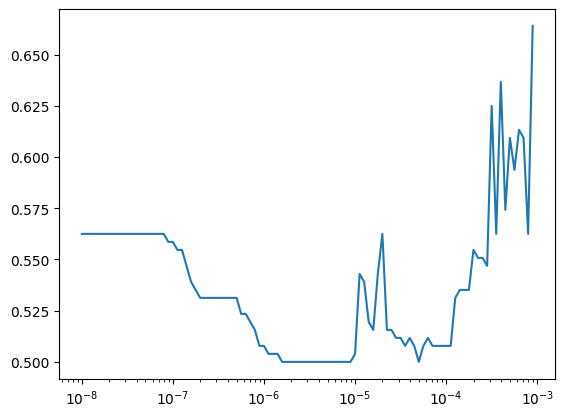

In [293]:
lrs = 1e-8 * 10 ** (tf.range(100)/20)
plt.semilogx(lrs, model_1_history.history["val_accuracy"])

In [386]:
model_1_preds = tf.round(tf.squeeze(model_1.predict(val_dataset)))
model_1_preds

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1

In [391]:
val_labels = []
for i in val_dataset.unbatch().as_numpy_iterator():
    _, label = i
    val_labels.append(label)

In [392]:
tf.squeeze(val_labels)

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [393]:
model_1.evaluate(train_dataset), model_1.evaluate(val_dataset)

8/8 [==============================] - 0s 18ms/step - loss: 0.3797 - accuracy: 0.8555


([0.30736398696899414, 0.8958130478858948], [0.37969544529914856, 0.85546875])

<Axes: >

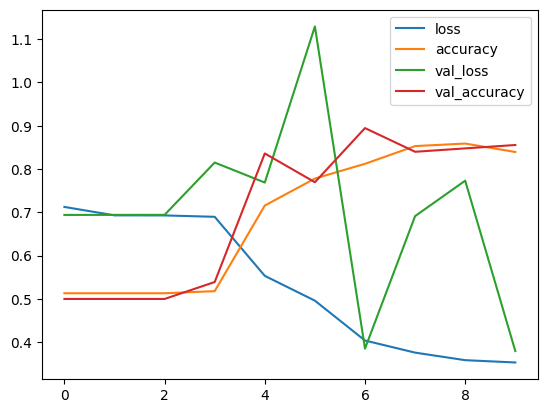

In [394]:
pd.DataFrame(model_1_history.history).plot()

In [396]:
from sklearn.metrics import accuracy_score
accuracy_score(tf.squeeze(val_labels), model_1_preds)

0.85546875